Aplicamos la deteccion de outliers por lejania o distancia a los datos de este set sobre duraznos.

*Librerias*

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
import Ourfunctions as fN
np.random.seed(123)

**Ahora leemos el csv, luego de haber corrido el from_exceltoCsv.py**

In [3]:
datos = pd.read_csv("duraznosfinal.csv")
#Eliminamos la primer columna que no nos aporta nada.
datos.drop(datos.columns[0],axis = 1, inplace = True)
datos.shape

(1186, 5)

**Tratamiento de NaN**

In [4]:
#Chequear si hay NaN
datos.isnull().sum()


Zona                      0
Finca                     0
Peso                      0
Diámetro Sutural          0
Diámetro Contrasutural    0
dtype: int64

In [5]:
#Esto no seria necesario dado que LOF deberia entrenarse con sus propios modelos.
#datos_clasif = fN.ClasificarOutliers(datos,"Peso") #Datos clasif = Datos ya clasificados como outliers
#datos_clasif.head()

**Algunos graficos para orientarnos en los valores atipicos.**


<AxesSubplot:xlabel='Zona', ylabel='Peso'>

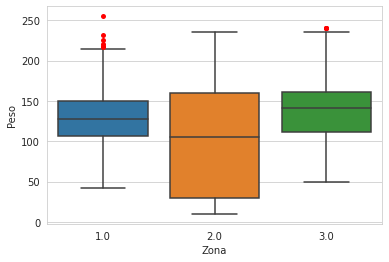

In [6]:
sns.set_style("whitegrid")
flierprops = dict(marker='o', markerfacecolor='red', markersize=5,  markeredgecolor='None')
sns.boxplot(data= datos,y = "Peso",x="Zona",flierprops = flierprops)

In [7]:
x = datos.drop(['Zona','Finca','Diámetro Contrasutural','Diámetro Sutural'], axis=1) 


In [8]:
x_train ,x_test = train_test_split(x,test_size=0.5)       #test_size=0.5(whole_data)

In [9]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
#Entrenar el modelo.
clf.fit(x_train)

LocalOutlierFactor(contamination=0.1)

In [10]:
#Detectar los outliers "manualmente"
ground_truth = fN.ClasificarOutliersVect(x)

In [18]:
y_pred = clf.fit_predict(x) #Devuelve etiquetas de los clusters.
n_errors =  (y_pred != ground_truth).sum()
x_scores = clf.negative_outlier_factor_
x

,Peso
0,147
1,87
2,139
3,159
4,128
...,...
1181,129
1182,125
1183,220
1184,100


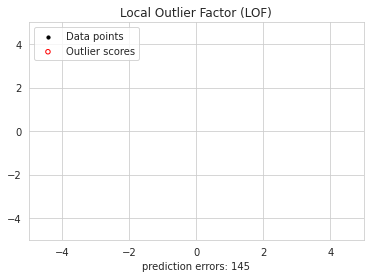

In [22]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(x, ground_truth, color="k", s=3.0, label="Data points")
radius = (x_scores.max() - x_scores) / (x_scores.max() - x_scores.min())
plt.scatter(
    x,
    ground_truth,
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()